## In this notebook I will look at the Iris data set.

This seems to be a clean and simple data set. I will use this to brush up on my Machine Learning and Python coding skills and see what I can get out of this.
So the first step would be to import the libraries that I might need and load the data here.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [162]:
data = pd.read_csv('./iris.csv') #importing the data

The actual data was downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/
My problem was that I could not remember how to load .data files and I didn't want to waste so much time at this moment. As a result, I decided to change the extension of the file in linux via the following command:
mv iris.data iris.csv
And it seems to work perfectly fine!

In [163]:
data.head(5) #looking at first 5 rows of the data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


I am not sure what any of theses columns mean. OK here is what the website says:

Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica


In [164]:
print(len(data.columns))
#data = pd.read_csv("./iris.csv", sep='\t', header = None)
#data.columns = ["sepal_lenght", "sepal_width", "pedal_length", "pedal_width", "class"]
names = ["sepal_length", "sepal_width", "pedal_length", "pedal_width", "class"]
data = pd.read_csv("./iris.csv", sep=',', names = names)
data.head(5)

5


,sepal_length,sepal_width,pedal_length,pedal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The first thing to do, is to replace the name of the flowers. I want to make sure that there is no null value anywhere and we only have these 3 categories of flowers.

In [165]:
data.isnull().any(axis=0) # I found that there is no null value anywhere! pretty clean data!

sepal_length    False
sepal_width     False
pedal_length    False
pedal_width     False
class           False
dtype: bool

In [166]:
data['class'].unique() #make sure that there are only 3 types

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [167]:
data.replace (['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] , [1, 2, 3], inplace=True)

In [170]:
#data['class_value'] = 0
#if data['class'] == "Iris-setosa":
 #   data['class_value']=1
#data.loc[data['class'] = 1, 'class_value'] = 1
#data.loc[data['class'] = 2, 'class_value'] = 2
#data.loc[data['class'] = 3, 'class_value']=3
#data.head(80)

([<matplotlib.axis.XTick at 0x7f69e1875890>,
 <a list of 3 Text xticklabel objects>)

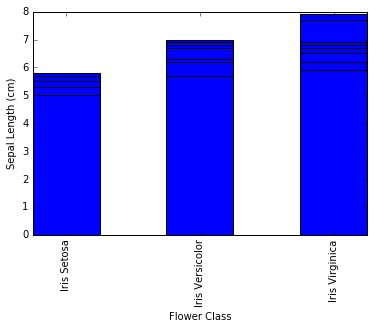

In [184]:
width = 0.5
plot1 =plt.bar(data['class'],  data['sepal_length'], width)
plt.xlabel('Flower Class')
plt.ylabel('Sepal Length (cm)')
plt.xticks((1.25,2.25,3.25),('Iris Setosa' , 'Iris Versicolor' , 'Iris Virginica'), rotation = 'vertical')

#This shows that the length is larger for the 3rd class or Iris Virginica

([<matplotlib.axis.XTick at 0x7f69e0e1c4d0>,
 <a list of 3 Text xticklabel objects>)

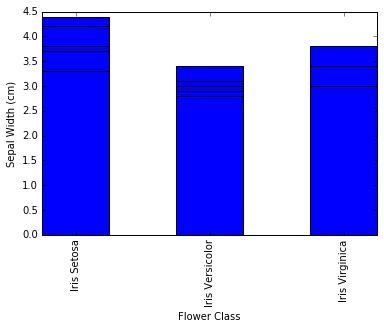

In [186]:
plot1 =plt.bar(data['class'],  data['sepal_width'], width)
plt.xlabel('Flower Class')
plt.ylabel('Sepal Width (cm)')
plt.xticks((1.25,2.25,3.25),('Iris Setosa' , 'Iris Versicolor' , 'Iris Virginica'), rotation = 'vertical')